# CS295/395: Secure Distributed Computation
## In-Class Exercise, Week of 8/29/2022

# Question 1

Write functions `enc` and `dec` for an additively homomorphic cryptosystem over the integers.

In [2]:
import numpy as np

def enc(x):
    assert x < (2**31) - 1
    k = np.random.randint(0, (2**31)-1)
    ciphertext = (x + k) % ((2**31)-1)
    return ciphertext, k

def dec(pair):
    c, k = pair
    plaintext = (c - k) % ((2**31)-1)
    return plaintext

In [3]:
#dec(enc(2**32))
dec(enc(9))

9

In [4]:
import matplotlib.pyplot as plt

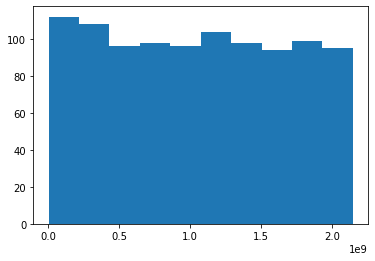

In [5]:
results = [enc(9)[0] for _ in range(1000)]
plt.hist(results);
#results

In [6]:
2**70+1

1180591620717411303425

In [7]:
c, k = enc(5)
c2, k2 = enc(20)
cp = c + c2
kp = k + k2
dec((cp, kp))

25

In [8]:
assert dec(enc(5)) == 5
assert dec(enc(0)) == 0
assert dec(enc(1)) == 1

c, k = enc(5)
assert dec((c + 10, k)) == 15

c2, k2 = enc(20)
assert dec((c + c2, k + k2)) == 25

In [9]:
k = 55
x1 = 10 # the adversary knows x1
x2 = 20

(x1 +k, x2 +k)

(65, 75)

In [10]:
# I want to encrypt n numbers
# That means I need to generate n keys

# Question 2

Why is the above solution considered a *one-time pad*?

1. The key is as long as the message or plaintext
2. You can only use each key once

# Question 3

What is problematic (for security) about the use of integers in the above solution?

Without modular arithmetic, the ciphertext leaks statistical information about the plaintext.

## Question 4

Write functions `plusFE` and `multFE` that add and multiply two field elements in $GF(p)$, respectively.

In [11]:
def plusFE(p, a, b):
    return (a+b) % p
    
def multFE(p, a, b):
    return (a*b) % p

In [12]:
assert plusFE(100, 2, 3) == 5
assert plusFE(3, 2, 3) == 2
assert plusFE(2, 1, 1) == 0
assert multFE(100, 2, 5) == 10
assert multFE(3, 2, 5) == 1
assert multFE(2, 1, 1) == 1
assert multFE(2, 1, 0) == 0

In [13]:
[[x*a%11 for a in range(0, 11)] for x in range(0, 11)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0, 2, 4, 6, 8, 10, 1, 3, 5, 7, 9],
 [0, 3, 6, 9, 1, 4, 7, 10, 2, 5, 8],
 [0, 4, 8, 1, 5, 9, 2, 6, 10, 3, 7],
 [0, 5, 10, 4, 9, 3, 8, 2, 7, 1, 6],
 [0, 6, 1, 7, 2, 8, 3, 9, 4, 10, 5],
 [0, 7, 3, 10, 6, 2, 9, 5, 1, 8, 4],
 [0, 8, 5, 2, 10, 7, 4, 1, 9, 6, 3],
 [0, 9, 7, 5, 3, 1, 10, 8, 6, 4, 2],
 [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]]

## Question 5

Write functions `enc` and `dec` for an additively homomorphic cryptosystem in the finite field $GF(p)$.

In [14]:
def enc(p, x):
    assert x < p
    k = np.random.randint(0, p)
    ciphertext = (x + k) % p
    return ciphertext, k

def dec(p, pair):
    c, k = pair
    plaintext = (c - k) % p
    return plaintext

In [15]:
assert dec(100, enc(100, 5)) == 5
assert dec(2, enc(2, 0)) == 0
assert dec(2, enc(2, 1)) == 1

c, k = enc(100, 5)
assert dec(100, (c + 10, k)) == 15

In [18]:
# this part happens on the client ("me")
p = 2**31 - 1
c1, k1 = enc(p, 5)
c2, k2 = enc(p, 20)

# send c1, c2 to server 1
# send k1, k2 to server 2

# computation on server 1
c = c1 + c2
# send c to client

# computation on server 2
k = k1 + k2
# send k to client

# computation on client
result = dec(p, (c, k))
result

25

## Question 6

Write a function `share` that generates $n$ additive secret shares from a single field element $x \in GF(p)$.

In [26]:
def sumFE(p, xs):
    total = 0
    for x in xs:
        total = plusFE(p, x, total)
    return total

def share(p, n, x):
    # first, generate n - 1 random numbers
    random_shares = [np.random.randint(0, p) for _ in range(n-1)]
    total = sumFE(p, random_shares)
    # last share should be such that last + total = x
    # x - total = last share
    # total + last = x
    last = plusFE(p, x, -total)
    return random_shares + [last]
    
sum(share(p, 3, 5)) % p

5

In [23]:
assert sumFE(100, share(100, 2, 5)) == 5
assert sumFE(2, share(2, 5, 1)) == 1
assert sumFE(2, share(2, 5, 0)) == 0
assert sumFE(2, share(2, 50, 1)) == 1

In [24]:
# Example
print(share(100, 2, 5))
print(share(2, 5, 1))

[36, 69]
[1, 0, 1, 1, 0]
